In [18]:
import pandas as pd
import numpy as np
from sklearn import * 

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
y = df.charges

In [4]:
X = df.iloc[:, :-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, 
                                                                   random_state = 1)

In [10]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_test_pred = est.predict(X_test)


In [14]:
result = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [15]:
result.head()

,actual,predicted
559,1646.4297,4610.315541
1087,11353.2276,12887.893880
1020,8798.5930,12573.948752
460,10381.4787,13197.836626
802,2103.0800,629.337182


In [16]:
result["residual"] = result.actual - result.predicted
result.head()

,actual,predicted,residual
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


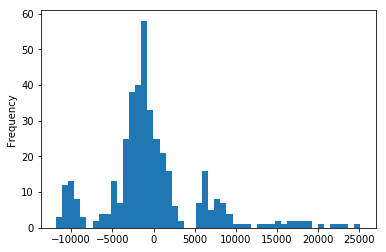

In [20]:
result.residual.plot.hist(bins = 50)

In [22]:
SSE = np.sum(result.residual ** 2)

In [24]:
MSE = SSE / result.shape[0]
MSE

36761456.35201325

In [25]:
RMSE = np.sqrt(MSE)
RMSE

6063.12265685045

In [26]:
np.std(y_test)

11904.481211649017